In [ ]:
!pip install -U sentence-transformers
import numpy as np
import pandas as pd
from nltk.tokenize import TweetTokenizer
import torch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


     |████████████████████████████████| 79 kB 2.1 MB/s 
     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 53.6 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 895 kB 59.4 MB/s 
     |████████████████████████████████| 6.6 MB 52.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e00d60263f769c55e917d42b00e9600eab27b0b527580f49ce22207ea9377b3c
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/EECS 498 Applied ML for Affective Computing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import analysis
from train import *

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2') 

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
subreddit = "Showerthoughts"
df = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/EECS 498 Applied ML for Affective Computing/data/csvdata/{subreddit}.csv")
df = analysis.cleanDataConcatenate(df)
df

,Title,Text,Upvotes,Subreddit,Num_comments,nsfw,Upvote_ratio,Has_text
0,The best way to go unrecognized by others thes...,the best way to go unrecognized by others thes...,1,Showerthoughts,1,False,1.00,True
1,Evaporated black coffee is a direct measure of...,evaporated black coffee is a direct measure of...,3,Showerthoughts,13,False,0.67,True
2,You are close to someone on discord when they ...,you are close to someone on discord when they ...,1,Showerthoughts,1,False,0.57,True
3,Every POV Is Actually A Camera´s POV,every pov is actually a camera´s pov,1,Showerthoughts,1,False,1.00,True
4,If I can’t believe it’s not butter isn’t butte...,if i can’t believe it’s not butter isn’t butte...,1,Showerthoughts,1,False,1.00,True
...,...,...,...,...,...,...,...,...
294346,Big guys are often ashamed to show love to the...,big guys are often ashamed to show love to the...,3,Showerthoughts,10,False,0.58,True
294347,Not getting posted because,not getting posted because,1,Showerthoughts,1,False,1.00,True
294348,WhateverItTakesFromYou Quote,whateverittakesfromyou quote,1,Showerthoughts,1,False,1.00,True
294349,Movies from the 90’s regularly showed people a...,movies from the 90’s regularly showed people a...,1,Showerthoughts,1,False,1.00,True


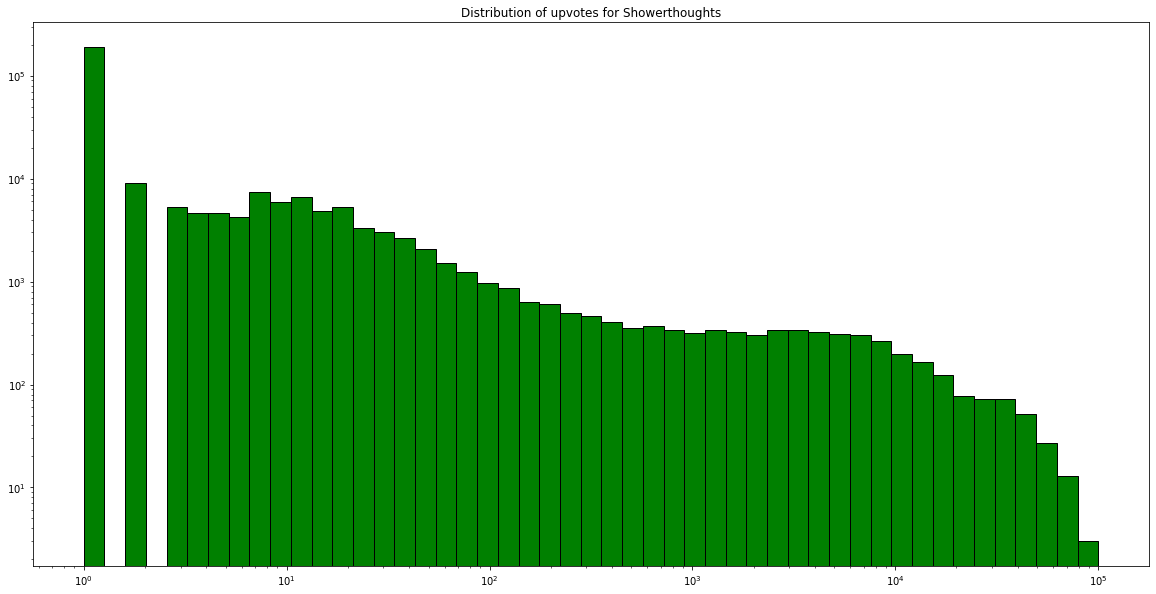

In [ ]:
analysis.upvoteHist(df)

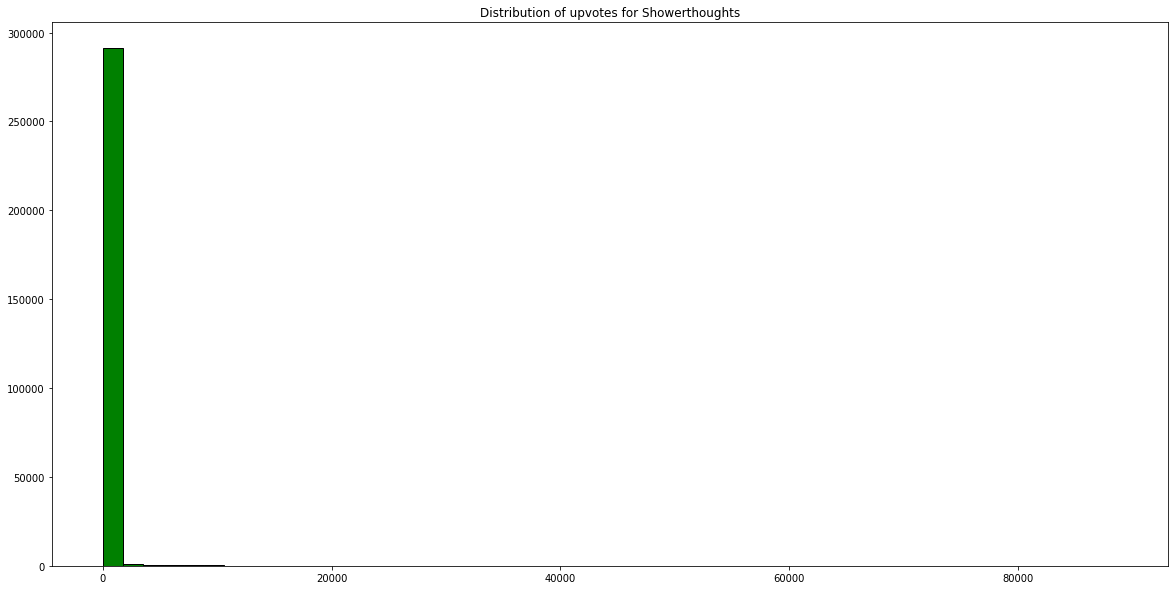

In [ ]:
    figure(figsize=(20, 10))
    tempdf = df
    plt.hist(tempdf['Upvotes'], bins=50, log=False, edgecolor='black', color='green')
    plt.title(f"Distribution of upvotes for {subreddit}")
    plt.show()

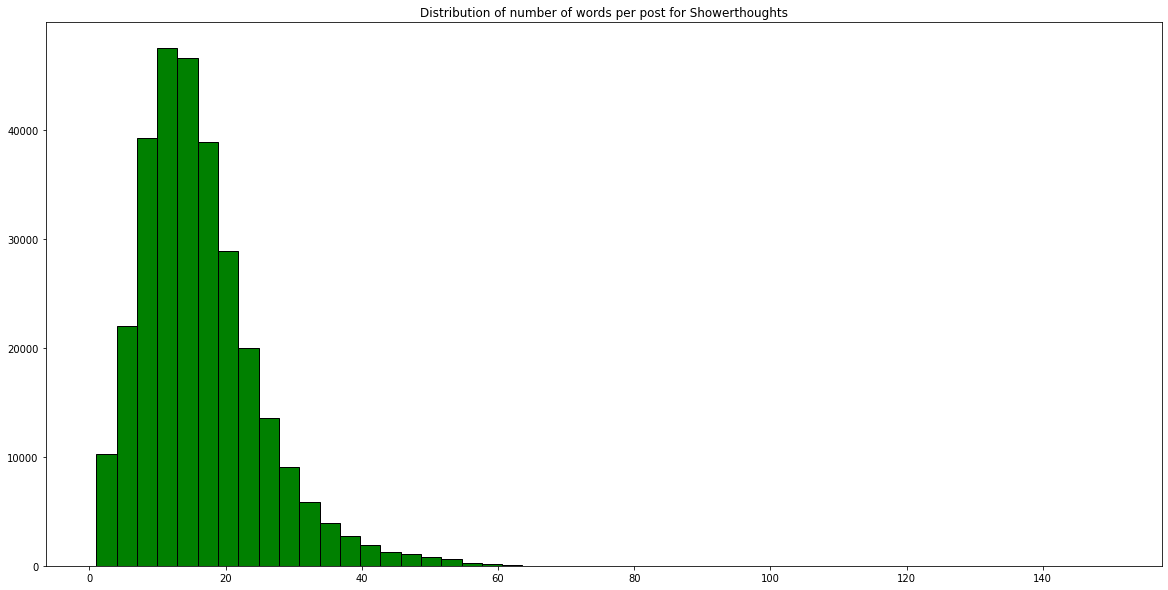

In [ ]:
analysis.numWordsHist(df)

In [ ]:
X = model.encode(df['Text'].to_numpy(), device='cuda', show_progress_bar=True, batch_size=128)
y = df['Upvotes'].to_numpy()

Batches:   0%|          | 0/2300 [00:00<?, ?it/s]

In [ ]:
crossValidate(X, y, trainOLS, evalsklearn, mse)

Cross Validation Iteration: 1
Cross Validation Iteration: 2
Cross Validation Iteration: 3
Cross Validation Iteration: 4
Cross Validation Iteration: 5
Cross Validation Iteration: 6
Cross Validation Iteration: 7
Cross Validation Iteration: 8
Cross Validation Iteration: 9
Cross Validation Iteration: 10


1979185.336616959

In [ ]:
crossValidate(X, y, trainRidge, evalsklearn, mse)

Cross Validation Iteration: 1
Cross Validation Iteration: 2
Cross Validation Iteration: 3
Cross Validation Iteration: 4
Cross Validation Iteration: 5
Cross Validation Iteration: 6
Cross Validation Iteration: 7
Cross Validation Iteration: 8
Cross Validation Iteration: 9
Cross Validation Iteration: 10


1979071.4442227692

In [ ]:
crossValidate(X, y, trainLasso, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainElasticNet, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainPoisson, evalsklearn, mse)

Cross Validation Iteration: 1
Cross Validation Iteration: 2
Cross Validation Iteration: 3
Cross Validation Iteration: 4
Cross Validation Iteration: 5
Cross Validation Iteration: 6
Cross Validation Iteration: 7
Cross Validation Iteration: 8
Cross Validation Iteration: 9
Cross Validation Iteration: 10


1979918.6320205363

In [ ]:
crossValidate(X, y, trainGamma, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainMlp, evalMLP, mse)

Cross Validation Iteration: 1


/content/drive/MyDrive/Colab Notebooks/EECS 498 Applied ML for Affective Computing/train.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  optimizer.zero_grad()
/content/drive/MyDrive/Colab Notebooks/EECS 498 Applied ML for Affective Computing/train.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = mlp(inputs).squeeze()


Samples Trained: 32000 running_loss: 24212.6953125
Samples Trained: 64000 running_loss: 1134589.125
Samples Trained: 96000 running_loss: 27500568.0
Samples Trained: 128000 running_loss: 3047714.75
Samples Trained: 160000 running_loss: 636.859375
Samples Trained: 192000 running_loss: 19220980.0
Samples Trained: 224000 running_loss: 2802.625
Samples Trained: 256000 running_loss: 426320.8125
Samples Trained: 32000 running_loss: 34740.765625
Samples Trained: 64000 running_loss: 879.421875
Samples Trained: 96000 running_loss: 58935.0
Samples Trained: 128000 running_loss: 58011.25
Samples Trained: 160000 running_loss: 288208.5
Samples Trained: 192000 running_loss: 12403.765625
Samples Trained: 224000 running_loss: 9674.921875
Samples Trained: 256000 running_loss: 4544207.5
[0.        0.        0.        ... 0.        1.9009161 2.204327 ]
[    0     0     0 ... 45499 47733 64445]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.07015900e+09
 2.27843929e+09 4.15315802e+09]


1643062.762039873